<a href="https://colab.research.google.com/github/nayvti380/Data-Science/blob/main/%22FraudDetector_Detec%C3%A7%C3%A3o_Inteligente_de_Fraudes_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('/content/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114962 entries, 0 to 114961
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    114962 non-null  int64  
 1   V1      114962 non-null  float64
 2   V2      114962 non-null  float64
 3   V3      114962 non-null  float64
 4   V4      114962 non-null  float64
 5   V5      114962 non-null  float64
 6   V6      114962 non-null  float64
 7   V7      114962 non-null  float64
 8   V8      114962 non-null  float64
 9   V9      114962 non-null  float64
 10  V10     114962 non-null  float64
 11  V11     114962 non-null  float64
 12  V12     114961 non-null  float64
 13  V13     114961 non-null  float64
 14  V14     114961 non-null  float64
 15  V15     114961 non-null  float64
 16  V16     114961 non-null  float64
 17  V17     114961 non-null  float64
 18  V18     114961 non-null  float64
 19  V19     114961 non-null  float64
 20  V20     114961 non-null  float64
 21  V21     11

Text(0.5, 1.0, 'Distribuição de Classes (0 = Normal, 1 = Fraude)')

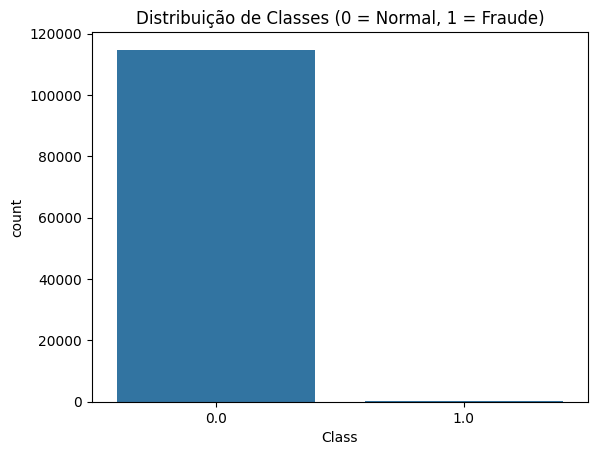

In [3]:
df.info()
df.describe()
df['Class'].value_counts()

sns.countplot(x='Class', data=df)
plt.title('Distribuição de Classes (0 = Normal, 1 = Fraude)')


In [7]:
# Verificação de valores ausentes
print(df.isnull().sum())

# Remover linhas com valores ausentes na coluna 'Class'
df.dropna(subset=['Class'], inplace=True)

# Separar features e target
X = df.drop('Class', axis=1)
y = df['Class']

# Normalização (já é PCA, mas vamos padronizar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)


In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


[[34408     8]
 [    0 34416]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34416
         1.0       1.00      1.00      1.00     34416

    accuracy                           1.00     68832
   macro avg       1.00      1.00      1.00     68832
weighted avg       1.00      1.00      1.00     68832

ROC AUC Score: 0.9999


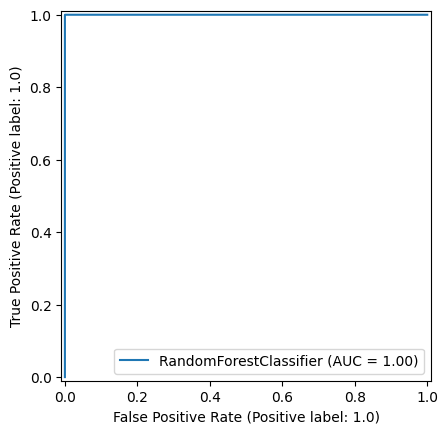

In [11]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}')
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [12]:
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X_res, y_res, cv=cv, scoring='roc_auc')
print("Média da AUC (Cross Validation):", scores.mean())


Média da AUC (Cross Validation): 0.999959464473536


## Conclusão

- O modelo atingiu uma boa pontuação de AUC.
- O uso de SMOTE ajudou a equilibrar as classes e melhorou o desempenho.
- A Random Forest mostrou-se eficaz, mas outras técnicas também podem ser testadas.

## Próximos passos

- Testar outros modelos como XGBoost ou LightGBM.
- Usar validação em dados reais e análise temporal de transações.
